# Assignment2
## Anomaly detection 데이터셋을 SVM을 이용해서 판별해보자
### 데이터 분포 : True : 0.17프로 나머지 다 False, Row약 28만행 < 데이터 트레인 시간이 오래걸립니다.(그래도 자고 일어나면 트레이닝 돼있기는 하는정도입니다.!!)
### 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!
### 시간이 없거나 좀 어렵다 하시는 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 됩니다.

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from tqdm import tqdm

In [3]:
ls

SN_ad.csv*                          voice.csv*
anomaly-detection/                  week3_SVM.pdf*
assignment.ipynb*                   실습코드.ipynb*
assignment2.ipynb*                  추가설명.pdf*


In [5]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('./anomaly-detection/creditcard.csv')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


## 1.데이터 전처리

### 1-1. 데이터 확인

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
Time      284806 non-null float64
V1        284806 non-null float64
V2        284806 non-null float64
V3        284806 non-null float64
V4        284806 non-null float64
V5        284806 non-null float64
V6        284806 non-null float64
V7        284806 non-null float64
V8        284806 non-null float64
V9        284806 non-null float64
V10       284806 non-null float64
V11       284806 non-null float64
V12       284806 non-null float64
V13       284806 non-null float64
V14       284806 non-null float64
V15       284806 non-null float64
V16       284806 non-null float64
V17       284806 non-null float64
V18       284806 non-null float64
V19       284806 non-null float64
V20       284806 non-null float64
V21       284806 non-null float64
V22       284806 non-null float64
V23       284806 non-null float64
V24       284806 non-null float64
V25       284806 non-null float64
V26  

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# 데이터 class 의 비율이 크게 차이남
# 우세한 비율의 클래스를 택하는 모형이 정확도가 높아지므로 모형의 성능판별이 어려워짐
# 비대칭 데이터 문제 (imbalanced data problem) 가 발생할 수 있음
data['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맥북이기에 애플고딕을 사용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

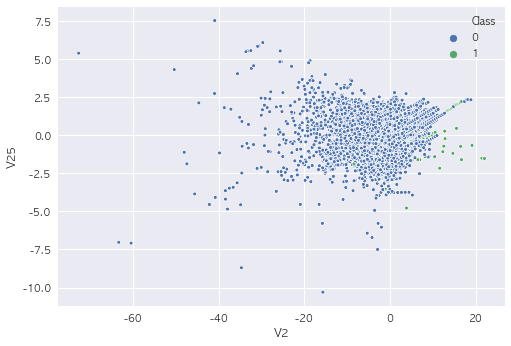

In [59]:
# scatterplot 으로 확인해보아도 압도적으로 class == 0 인 데이터가 많음
sns.scatterplot(x = 'V2', y='V25', hue = 'Class', data = data, s = 15)

In [ ]:
# 비대칭 데이터 해결방법은 다음과 같음
# 클래스 데이터에서 일부만 사용하는 언더 샘플링을 사용하여 비대칭 데이터 문제를 해결하고자 함

   - 오버샘플링
   - 언더샘플링
   - 복합샘플링

### 1-2. 언더샘플링

In [27]:
X = data[data.columns[:30]]
y = data.Class

   - Random Under-Sampler

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
X_samp, y_samp = RandomUnderSampler(random_state = 0).fit_sample(X,y)

In [40]:
temp = pd.concat((X_samp, y_samp), axis=1)

In [58]:
# class 의 비율을 똑같이 sampling 해줌
temp['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

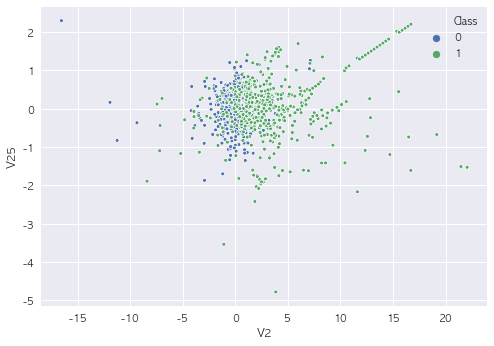

In [55]:
# sampling 전 scatterplot 보다 균형적인 데이터 분포를 보여줌
sns.scatterplot(x = 'V2', y='V25', hue = 'Class', data = temp, s = 15)

## 2. SVM 모델

### 2-1. linear 모델

In [63]:
# X_samp 정규화 -> X_scale
scale = StandardScaler()
X_scale = scale.fit_transform(X_samp)

In [ ]:
# train, test 데이터 분할 (비율 8 : 2)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_samp, test_size=0.2, random_state=45)

In [118]:
svm = SVC(kernel ='linear') # 선형 모델 생성
svm.fit(X_train, y_train) # train 데이터로 학습

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
y_pred = svm.predict(X_test) # 학습된 모델로 test 데이터 예측
y_pred # 예측된 test 데이터

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [125]:
print('학습용 데이터셋 정확도 {:.3f}'.format(svm.score(X_train, y_train)))
print('테스트용 데이터셋 정확도 {:.3f}'.format(svm.score(X_test, y_test)))

학습용 데이터셋 정확도 0.952
테스트용 데이터셋 정확도 0.919


In [126]:
confusion_matrix(y_test, y_pred)

array([[94,  4],
       [12, 87]])

   - 정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 수의 비율
   - 정밀도(precision) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율
   - 재현율(recall) : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율
   - F-score : 정밀도와 재현율의 가중조화평균(weight harmonic average)
    
   ###### 출처 : https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/

In [127]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       106
           1       0.88      0.96      0.92        91

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



## 2-2. 다중 평가 지표

###### 출처 : https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/cross_validate.ipynb

In [182]:
# 다중 평가 지표란 여러 개의 지표를 사용하여 모델을 평가하는 것을 의미함
from sklearn.model_selection import cross_validate

In [199]:
# 다양한 지표들을 확인 할 수 있음
# train 과 test 데이터가 모두 결과로 반환됨 + 걸린 시간도 반환함
cross_validate(SVC(gamma='auto'), X_train, y_train, 
               scoring=['accuracy', 'roc_auc'], 
               return_train_score=True, cv=3)

{'fit_time': array([0.006809  , 0.0060339 , 0.00643516]),
 'score_time': array([0.006428  , 0.006464  , 0.00671482]),
 'test_accuracy': array([0.94296578, 0.91221374, 0.9351145 ]),
 'train_accuracy': array([0.94083969, 0.96      , 0.94285714]),
 'test_roc_auc': array([0.98386537, 0.96824194, 0.99067653]),
 'train_roc_auc': array([0.99208962, 0.99309204, 0.98911561])}

In [280]:

cs = range(1,80) # c 값은 1~80 까지 정수
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
result = []

for c in tqdm(cs):
    for gamma in gammas:
        svm = SVC(kernel = 'rbf', C = c, gamma = gamma)
        scores = cross_validate(svm, X_train, y_train, cv=10, scoring='accuracy') # 점수를 리스트로 관리해줍니다.
        score = np.mean(scores['test_score']) #10개 스코어 값의 평균
        value = [c, gamma, score] # 각 c, gamma, score 값을 저장
        result.append(value)
        

100%|██████████| 79/79 [01:30<00:00,  1.14s/it]


In [236]:
df_result = pd.DataFrame(result, columns = ['C', "gamma", "score"])

In [260]:
# 가장 높은 score 값, 정확도
max(df_result.values[:,2])

0.9416423239208049

In [265]:
# score 값이 가장 높을 때는 gamma 값이 0.01
df_result[df_result['score'] >= 0.94164232392080499]

,C,gamma,score
247,42,0.01,0.941642
253,43,0.01,0.941642
259,44,0.01,0.941642
265,45,0.01,0.941642
271,46,0.01,0.941642
277,47,0.01,0.941642
283,48,0.01,0.941642
289,49,0.01,0.941642
295,50,0.01,0.941642
301,51,0.01,0.941642


In [151]:
from sklearn.model_selection import GridSearchCV

In [288]:
cs

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
       98, 99])

In [289]:
# GridSearchCV 적용
# cs = np.arange(40,100,1) # C 값은 30~100 정수
# gammas = np.arange(,0.01,1,0.01) # gamma 값은 0.01 ~ 1 까지 0.01 간격, 100개
# (너무 오래 걸려서 아래로 바꿈)

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid, 
                    scoring=['accuracy'], refit='accuracy',
                    return_train_score=True, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=True,
             scoring=['accuracy'], verbose=0)

In [290]:
# 최적의 gamma 는 0.1
grid.best_params_

{'gamma': 0.1}

In [291]:
grid.best_score_

0.9275534786520767

In [292]:
# gamma 가 0.1 일 때, mean_test_accuracy 가 가장 높음
np.transpose(pd.DataFrame(grid.cv_results_))

,0,1,2,3,4
mean_fit_time,0.013915,0.00497063,0.00719778,0.0135431,0.0138378
std_fit_time,0.00101333,0.000323516,0.000319456,6.49797e-05,0.000109413
mean_score_time,0.00607069,0.00208569,0.00262062,0.00505781,0.00528701
std_score_time,0.000439121,6.36403e-05,3.0991e-05,0.00017809,2.29265e-05
param_gamma,0.0001,0.01,0.1,1,10
params,{'gamma': 0.0001},{'gamma': 0.01},{'gamma': 0.1},{'gamma': 1},{'gamma': 10}
split0_test_accuracy,0.684411,0.931559,0.942966,0.86692,0.547529
split1_test_accuracy,0.675573,0.896947,0.90458,0.824427,0.538168
split2_test_accuracy,0.687023,0.927481,0.935115,0.820611,0.545802
mean_test_accuracy,0.682335,0.918662,0.927553,0.837319,0.543833
